## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 32.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
#reading and manipulating data
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#splitting data
from sklearn.model_selection import train_test_split, GridSearchCV

#decision tree module
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

#model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#installation of zipcode package from faqs
!pip install -q sqlalchemy_mate==1.4.28.4 uszipcode==1.0.1 fuzzywuzzy==0.18.0 python-Levenshtein==0.20.9

# Verify installation
#!pip show sqlalchemy_mate uszipcode

#import zipcode libraries
from uszipcode import SearchEngine, SimpleZipcode, ComprehensiveZipcode

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


## Loading the dataset

In [ ]:
#load data from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read data
data = pd.read_csv('/content/drive/My Drive/AI Cert Course/Machine Learning/Project 2/Loan_Modeling.csv')

In [ ]:
#make copy of data to avoid changing original
df = data.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
#check that data was imported correctly
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#another check on the data
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#check the number of rows and columns
df.shape

(5000, 14)

The data has 5,000 rows and 14 columns.

In [ ]:
#check the attribute types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All the variables are numerical, and only CCAvg is of float type. However, some variables are categorical in nature that have already been encoded -- including Education, Personal Loan, Securities Account, CD Account, Online, and Credit Card.
* ZIP code was read as a numerical variable, but is really a categorical variable.
* The dependent variable is Personal_Loan.

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The average customer age is 45, with the youngest being 23 and the oldest being 67.
* The minimum years of number experience is -3.
* The average customer income is almost 74,000, with the minimum being 8,000 and the maximum being 224,000.
* The average monthly customer credit card spending is 1,938, with the minimum 0 and the maximum 10,000
* The average mortgage is 56,500, with the minimum 0 and the maximum 635,000.
* All the customers have some level of education, and the average level is between undergraduate and graduate.
* As expected, about 9 percent of customers accepted the personal loan offer.
* 10 percent of customers have a securities account, and 6 percent have a CD account.
* About 59 percent use internet banking facilities.
* About 29 percent use a credit card issued by other banks.

In [ ]:
#taking a look at the customers with negative experience
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


All the customers with negative experience are in their 20s, indicating they're likely pursuing degrees or completed their degrees and are looking for employment.

In [ ]:
#taking a look at how many different zip codes are in the data
df['ZIPCode'].value_counts()

,count
ZIPCode,
94720,169
94305,127
95616,116
90095,71
93106,57
...,...
94970,1
90068,1
90813,1


There are 467 different zip codes represented in the data.

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


There are no null values.

In [ ]:
int(df.duplicated().sum())

0

There are no duplicate values.

In [ ]:
df['ID'].nunique()

5000

All the customer IDs are unique, so all the entries in the dataframe are unique customers.

In [ ]:
#dropping the customer IDs column since they're all unique and not needed
df.drop('ID', axis = 1, inplace = True)

In [ ]:
#confirming ID column was dropped correctly
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Questions**

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

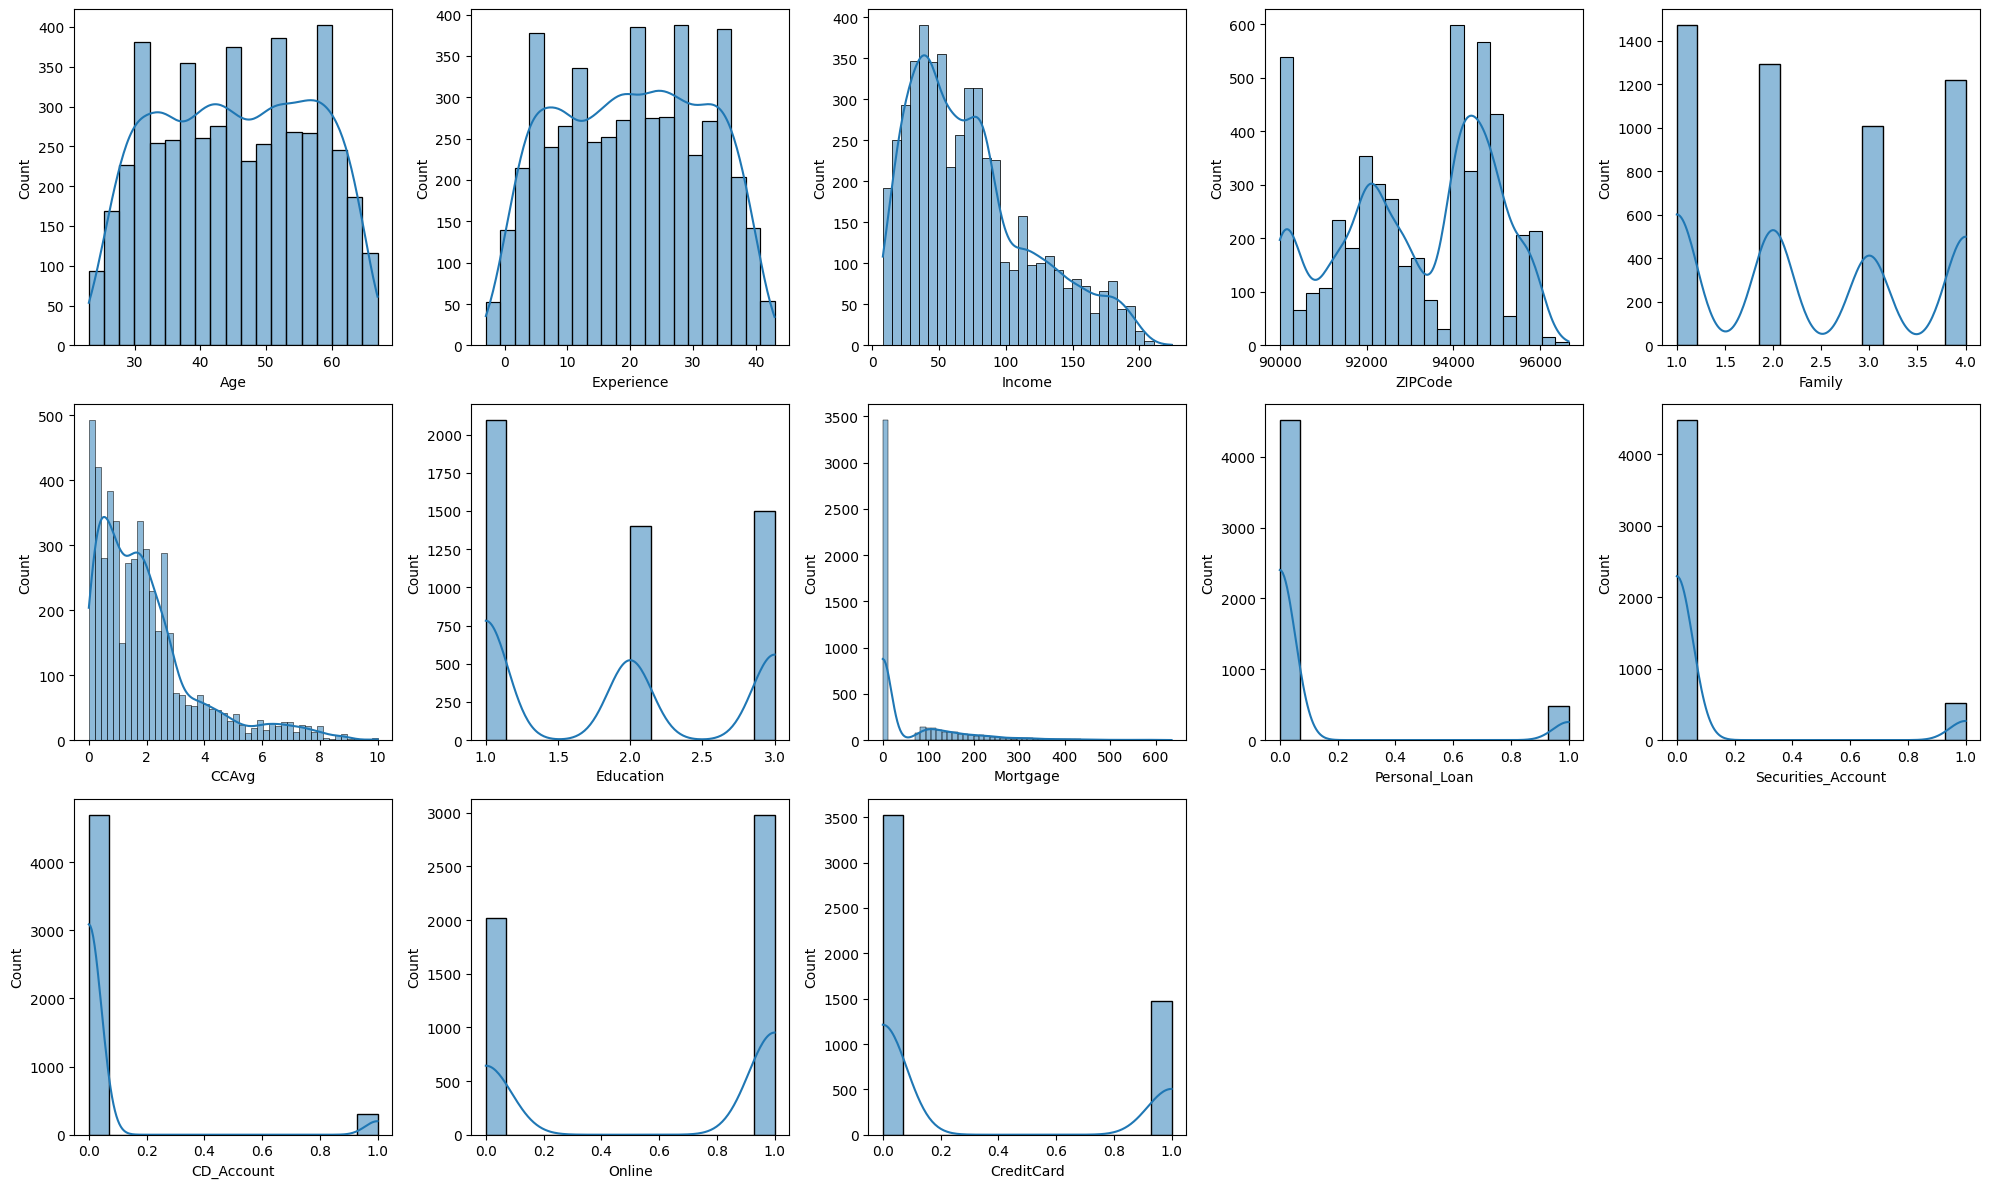

In [ ]:
# create wide area for histplots
plt.figure(figsize=(20, 12))

# create histplots -- 5 across, 3 down
for i, feature in enumerate(df.columns):
    plt.subplot(3, 5, i+1)
    sns.histplot(data=df, x=feature, kde = True)

plt.tight_layout();   #add spacing between plots

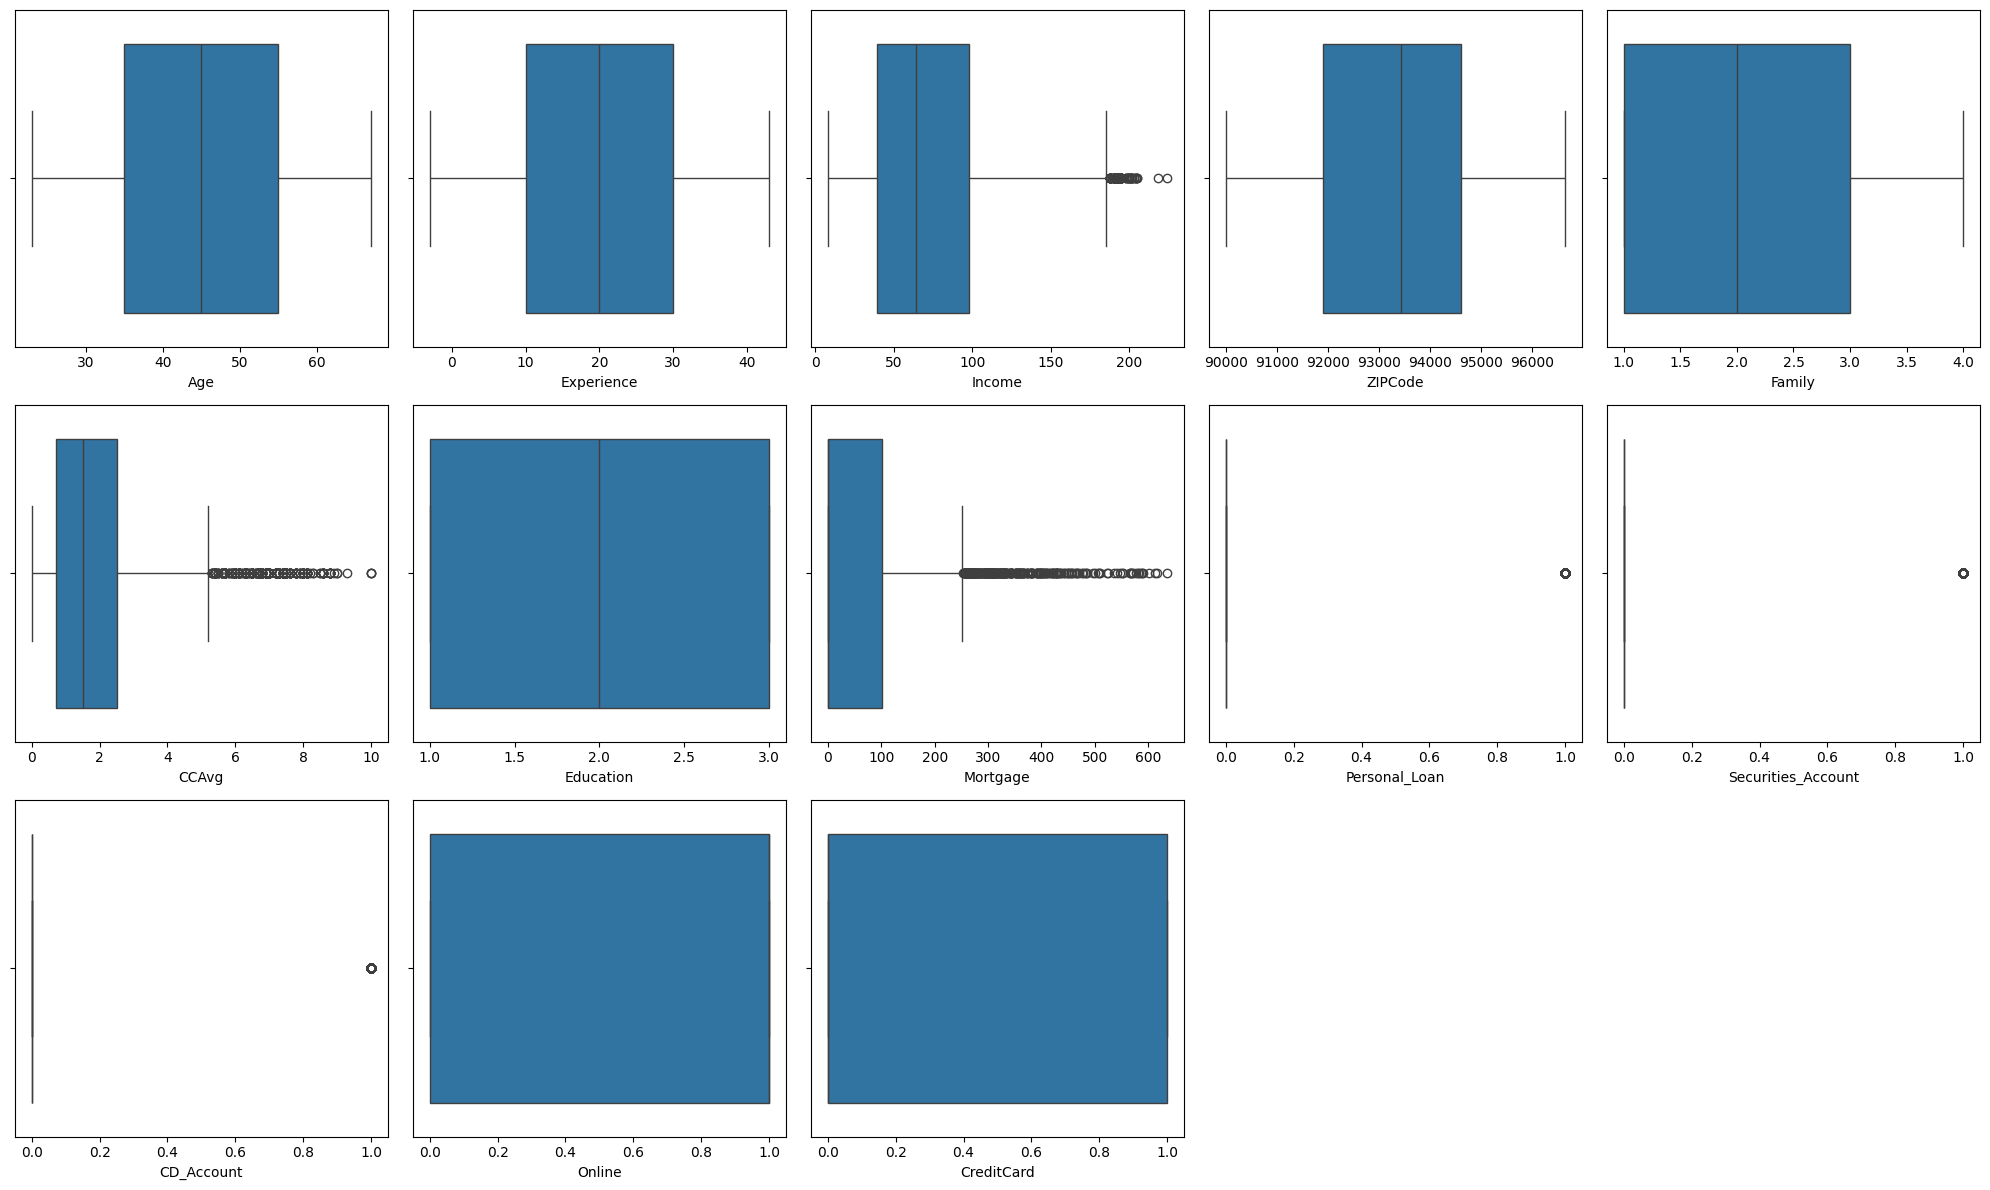

In [ ]:
# do same thing, but with boxplots
plt.figure(figsize=(20, 12))

for i, feature in enumerate(df.columns):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=df, x=feature)

plt.tight_layout();

* The mortgage attribute skews right.
* Most customers do not have a mortgage, and 75 percent of customers have a mortgage less than 101,000 (confirmed by describe function previously called).
* Mortgages above 252,500 (since the upper whisker is Q3 + 1.5 * IQR, or 101,000 + 1.5 * 101,000) are all outliers, and there are many.
* The mean is 56,500.

In [ ]:
df['CreditCard'].value_counts()

,count
CreditCard,
0,3530
1,1470


1,470 customers have credit cards.

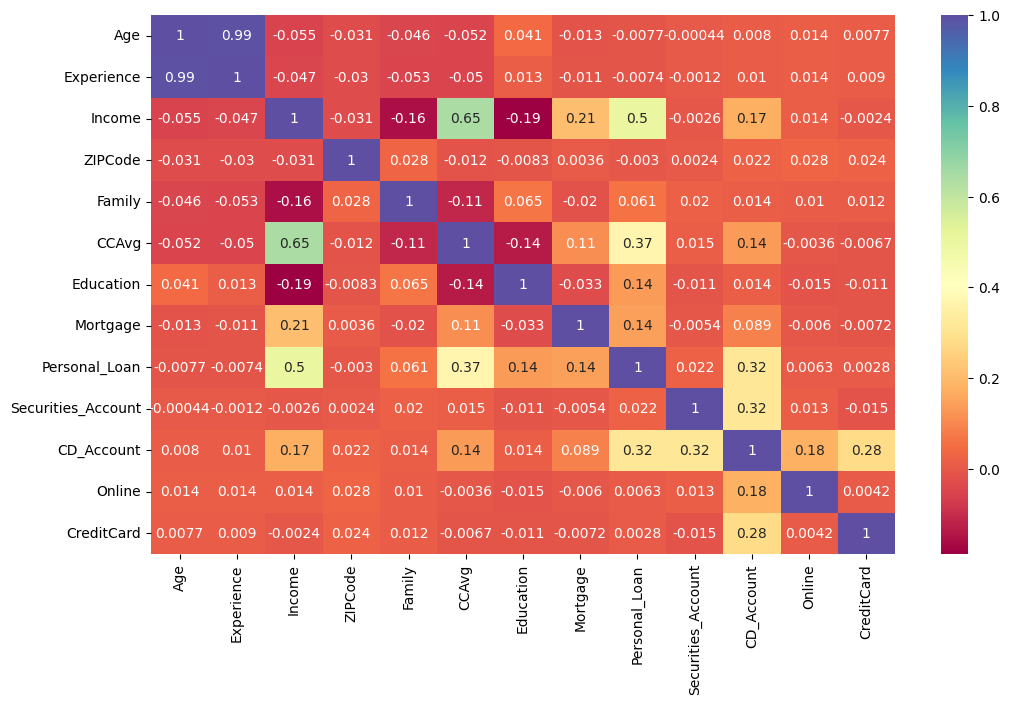

In [ ]:
#heatmap area
plt.figure(figsize=(12, 7))

#make the heatmap
sns.heatmap(df.corr(), annot=True, cmap = 'Spectral');

The attributes that have the most correlation with the target variable Personal Loan include Income (0.5), CCAvg (0.37), and CD_Account (0.32) -- but those correlations aren't particularly strong.

In [ ]:
#create a new dataframe to look at only the customers who took the personal loan
#plots that included customers who did not take out loans looked too cluttered
tookloan = df[df['Personal_Loan'] == 1]

In [ ]:
#check that the new dataframe was created correctly
tookloan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [ ]:
#check the number of customers who took the loan
tookloan.shape

(480, 13)

480 customers took the loan last time around; this matches the 9 percent acceptance rate.

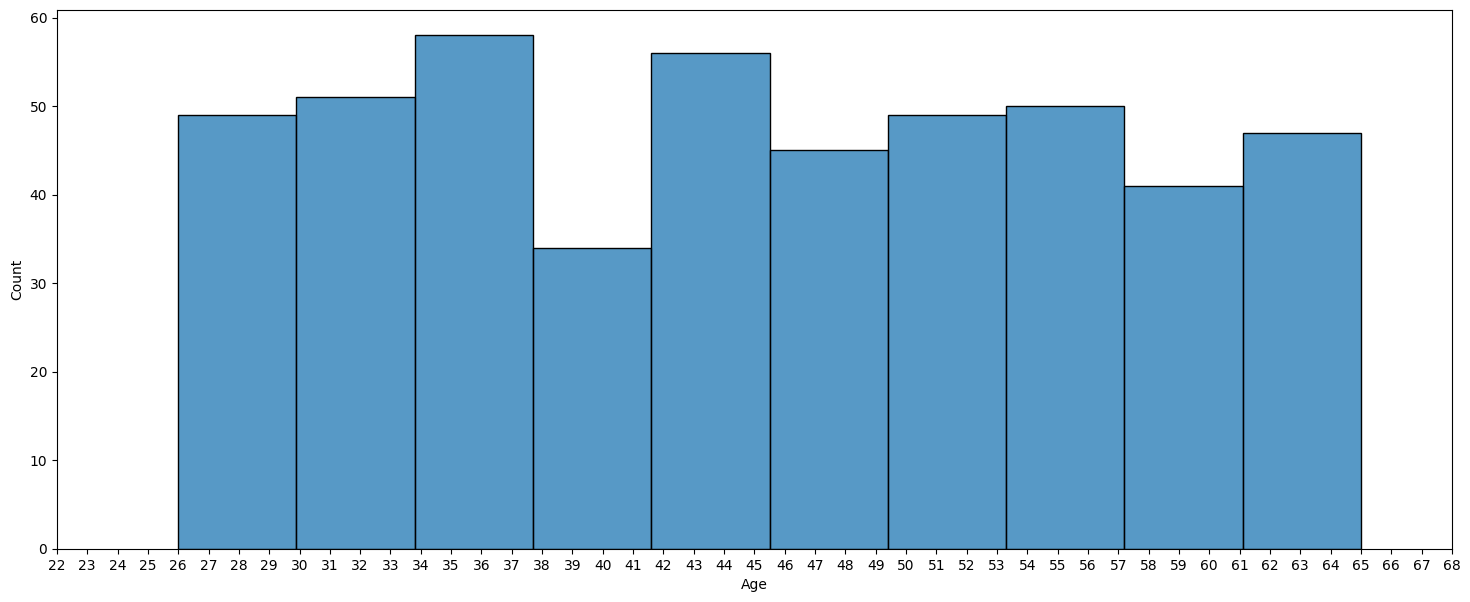

In [ ]:
#histplot area
plt.figure(figsize=(18, 7))

#make a histplot showing age with whether the customer took out a personal loan
sns.histplot(data=tookloan, x = 'Age');
plt.xticks(range(22,69)) #the min and max ages are 23 and 67 respectively
plt.show()

* Customers between 34 and just over 37 were most interested in the personal loan, and customers between just under 38 and just over 41 were the least interested.
* The age distribution is multimodal.
* Overall, interest in the personal loan increased until just over 37. A sharp dropoff follows from just under 38 to just over 41, followed by less dramatic increases and decreases.

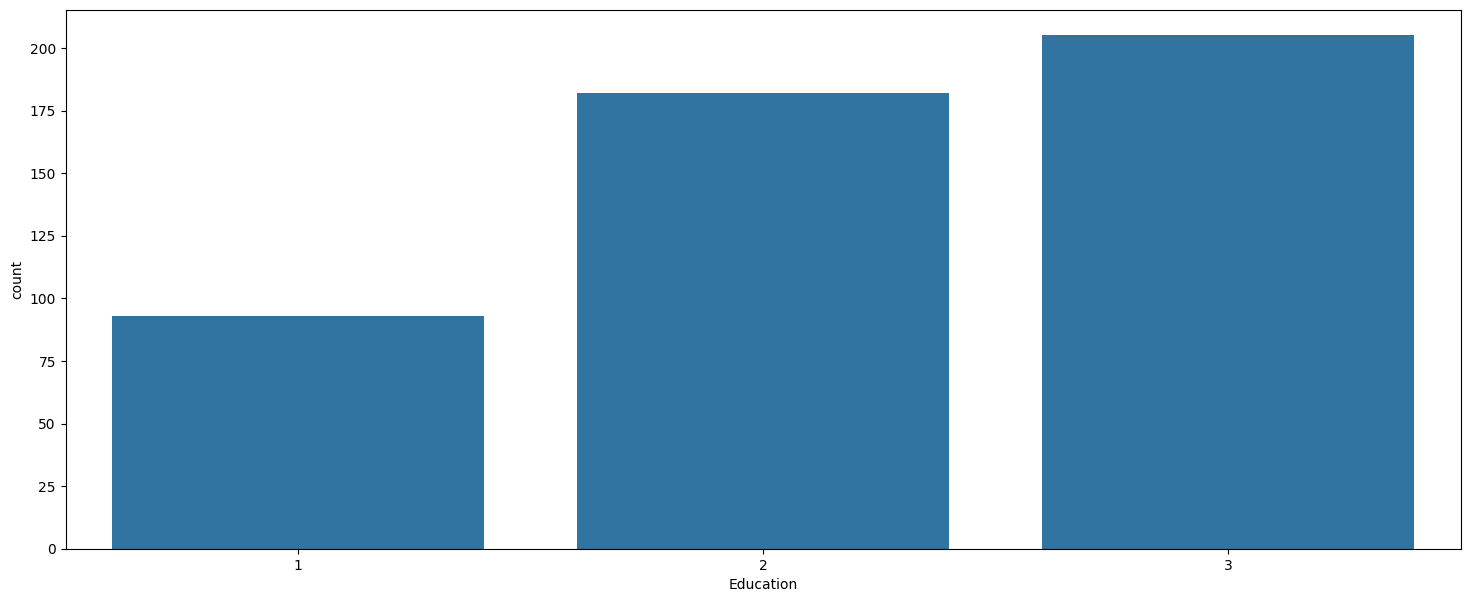

In [ ]:
#countplot area
plt.figure(figsize=(18, 7))

#make a countplot showing education with whether the customer took out a personal loan
sns.countplot(data=tookloan, x = 'Education');
plt.show()

Interest in the personal loan increased with education level, with customers with advanced/professional education taking out the most loans, followed by those with a graduate education. Undergraduates had the lowest interest in the personal loans.

### Other Observations

In [ ]:
#pairplots
plt.figure(figsize=(60, 20))

sns.pairplot(df, hue='Personal_Loan', diag_kind='kde');


Output hidden; open in https://colab.research.google.com to view.

* Customers with incomes above 100,000 took the personal loan across age and experience levels
* Customers with credit card average spending around 3,000 and above took the personal loan
* Customers without a CD account were mostly not interested in the personal loan, though some of those with a mortgage around 300,000 and above had some interest
* Customers with families of 2 or more, with incomes of 100,000 or more had high interest in the personal loan
* Customers with a graduate education with incomes of more than 100,000 took the personal loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Missing Value Treatment

As seen above, there are no missing values in the data.

###Feature Engineering

In [ ]:
#feature engineering the zipcodes

#convert the zipcode column to strings so the zipcode package can work with the variables
df['ZIPCode'] = df['ZIPCode'].astype(str)

In [ ]:
#confirm it was converted correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


In [ ]:
#use zipcodes python pkg to turn zipcodes into counties
search = SearchEngine()

#define a function to take the zipcode, pull the county associated with it, and return the county. If the zipcode is missing from the zipcode pkg, return unknown
def getcounty(zip):
  zipobj = search.by_zipcode(zip)
  return zipobj.county if zipobj else 'Unknown'
  search.close() #i had to put this in to prevent a long list of exceptions from appearing

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
#apply the function to create a new column with each customer's county
df['County'] = df['ZIPCode'].apply(getcounty)

In [ ]:
#check how the dataframe looks with the new column
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [ ]:
#check how many of each county is represented
countiesdf = df['County'].value_counts()
countiesdf

,count
County,
Los Angeles County,1095
San Diego County,568
Santa Clara County,563
Alameda County,500
Orange County,339
San Francisco County,257
San Mateo County,204
Sacramento County,184
Santa Barbara County,154


In [ ]:
#see how many counties in total are represented
countiesdf.shape

(39,)

There are 39 counties represented in the dataset, including the Unknown group.

In [ ]:
#take a look at the customers with zipcodes that were missing from the zipcode pkg
missingzips = df[df['County'] == 'Unknown']
missingzips.groupby('County')['ZIPCode'].value_counts()

County   ZIPCode
Unknown  92717      22
         96651       6
         92634       5
         93077       1
Name: count, dtype: int64

In [ ]:
#add up all the customers with missing zipcodes
(missingzips['County'] == 'Unknown').value_counts()

,count
County,
True,34


Four zipcodes were missing from the zipcode pkg (92717, 96651, 92634, and 93077). 34 customers had zipcodes encoded as 'Unknown'. To avoid improperly lumping the customers from four different zipcodes together, and since the number is so small (34 out of 5,000), we'll drop the missing zipcodes from our dataset.

In [ ]:
#find the rows that have "Unknown" for "County" and drop those rows
df.drop(df[df['County'] == 'Unknown'].index, axis = 0, inplace = True)

In [ ]:
#check the county count totals to make sure the unknowns are gone
countiesdf = df['County'].value_counts()
countiesdf

,count
County,
Los Angeles County,1095
San Diego County,568
Santa Clara County,563
Alameda County,500
Orange County,339
San Francisco County,257
San Mateo County,204
Sacramento County,184
Santa Barbara County,154


In [ ]:
#now that we've added the counties column, drop the zipcode column
df.drop(['ZIPCode'], axis = 1, inplace = True)

In [ ]:
#check that zipcode column was dropped correctly
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Los Angeles County


As noted before, some customers have "negative" experience, which given their age range in the 20s, would imply they're still working toward degrees. Converting those negatives to positives doesn't seem like the right approach, as it would mean crediting a customer with professional experience, when they in reality do not have it yet (someone with -3 experience would then be credited with 3 years of experience, which seems even less accurate). Given this reasoning, I will leave the experience values as-is.  

###Outlier Detection and Treatment

As seen above, while there are outliers in the data, none appear to need treatment/none appear to be disruptive to modeling. Given the problem statement, we'll use decision trees for modeling.

### Preparing Data for Modeling

In [ ]:
#preparing data for modeling
X = df.drop(['Personal_Loan'], axis = 1)
y = df['Personal_Loan']

In [ ]:
#need to create dummies since we added the County categorical val

X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,...,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,1,49,4,1.6,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,45,19,34,3,1.5,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,39,15,11,1,1.0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,35,9,100,1,2.7,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,35,8,45,4,1.0,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#split the data into 70:30 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
#a look at the training and test set breakdowns
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of customers who took the personal loan in training set:")
print(100 * y_train.value_counts(normalize=True), '\n')
print("Percentage of customers who took the personal loan in test set:")
print(100 * y_test.value_counts(normalize=True))

Shape of training set: (3476, 48)
Shape of test set: (1490, 48) 

Percentage of customers who took the personal loan in training set:
Personal_Loan
0    90.535098
1     9.464902
Name: proportion, dtype: float64 

Percentage of customers who took the personal loan in test set:
Personal_Loan
0    90.067114
1     9.932886
Name: proportion, dtype: float64


## Model Building -- SKLearn Default

In [ ]:
#providing a "class_weight = balanced" parameter since the number of "positives" is just 9 percent and the number of "negatives" is 91 percent
dtree_def = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')
dtree_def.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [ ]:
#predict
y_train_pred_def = dtree_def.predict(X_train)
y_test_pred_def = dtree_def.predict(X_test)

### Model Evaluation



The model can make wrong predictions by:
* Predicting a customer would not take out a loan, but actually would
* Predicting a customer would take out a loan, but actually would not

It is preferred that the model err on the side of predicting a customer would take out a loan, but wouldn't -- or the bank may miss out on potential loan-seekers. Thus, we want to minimize false negatives, which means we want to maximize recall.

##### Metrics and Confusion Matrices

In [ ]:
#evaluate models on training set
accuracy_train_def = accuracy_score(y_train, y_train_pred_def)
recall_train_def = recall_score(y_train, y_train_pred_def)
precision_train_def = precision_score(y_train, y_train_pred_def)
f1_train_def = f1_score(y_train, y_train_pred_def)

In [ ]:
#make a dataframe to show all the training set performance metrics
perf_metrics_def1_train = pd.DataFrame({"Accuracy": accuracy_train_def, "Recall": recall_train_def, "Precision": precision_train_def, "F1": f1_train_def}, index=[0])
perf_metrics_def1_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


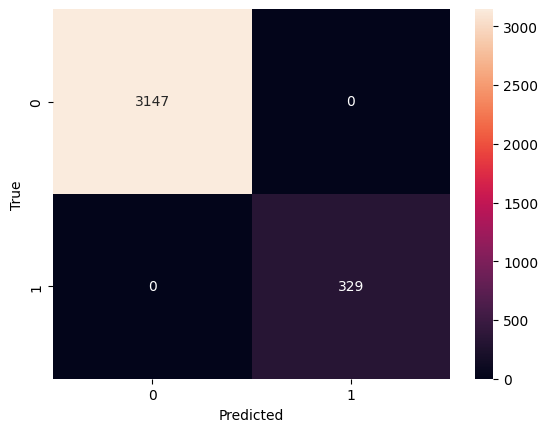

In [ ]:
#make confusion matrix to see how model performed on training set
cm_def_tr = confusion_matrix(y_train, y_train_pred_def)
sns.heatmap(cm_def_tr, annot=True, fmt='')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

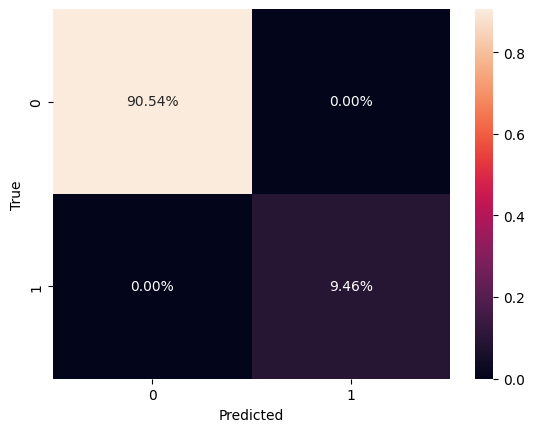

In [ ]:
#making the confusion matrix again with percentages
cm_def_tr2 = confusion_matrix(y_train, y_train_pred_def)
sns.heatmap(cm_def_tr2/np.sum(cm_def_tr2), annot=True, fmt = '.2%')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This first version of the decision tree is likely overfit -- the metrics scores are all 1, and the confusion matrix shows the model perfectly predicted all the outcomes in the training set.

In [ ]:
#Checking the model performance on the test set
accuracy_test_def = accuracy_score(y_test, y_test_pred_def)
recall_test_def = recall_score(y_test, y_test_pred_def)
precision_test_def = precision_score(y_test, y_test_pred_def)
f1_test_def = f1_score(y_test, y_test_pred_def)

In [ ]:
#make a dataframe to show all the performance metrics
perf_metrics_def1_test = pd.DataFrame({"Accuracy": accuracy_test_def, "Recall": recall_test_def, "Precision": precision_test_def, "F1": f1_test_def}, index=[0])
perf_metrics_def1_test

,Accuracy,Recall,Precision,F1
0,0.974497,0.864865,0.876712,0.870748


The metrics don't look too bad on the test data, but recall is the lowest among them -- and we want recall to be as high as possible.

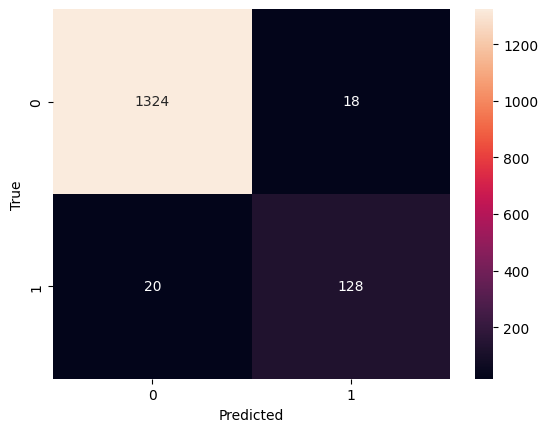

In [ ]:
#make confusion matrix to see how model performed on test set
cm_def_test = confusion_matrix(y_test, y_test_pred_def)
sns.heatmap(cm_def_test, annot=True, fmt='')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

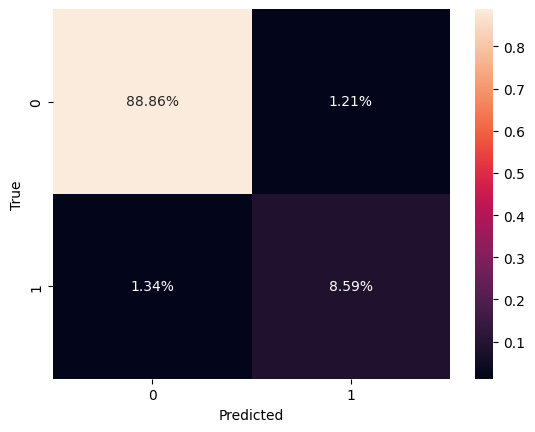

In [ ]:
#making the confusion matrix again with percentages
cm_def_test2 = confusion_matrix(y_test, y_test_pred_def)
sns.heatmap(cm_def_test2/np.sum(cm_def_test2), annot=True, fmt = '.2%')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Visualization and Importances

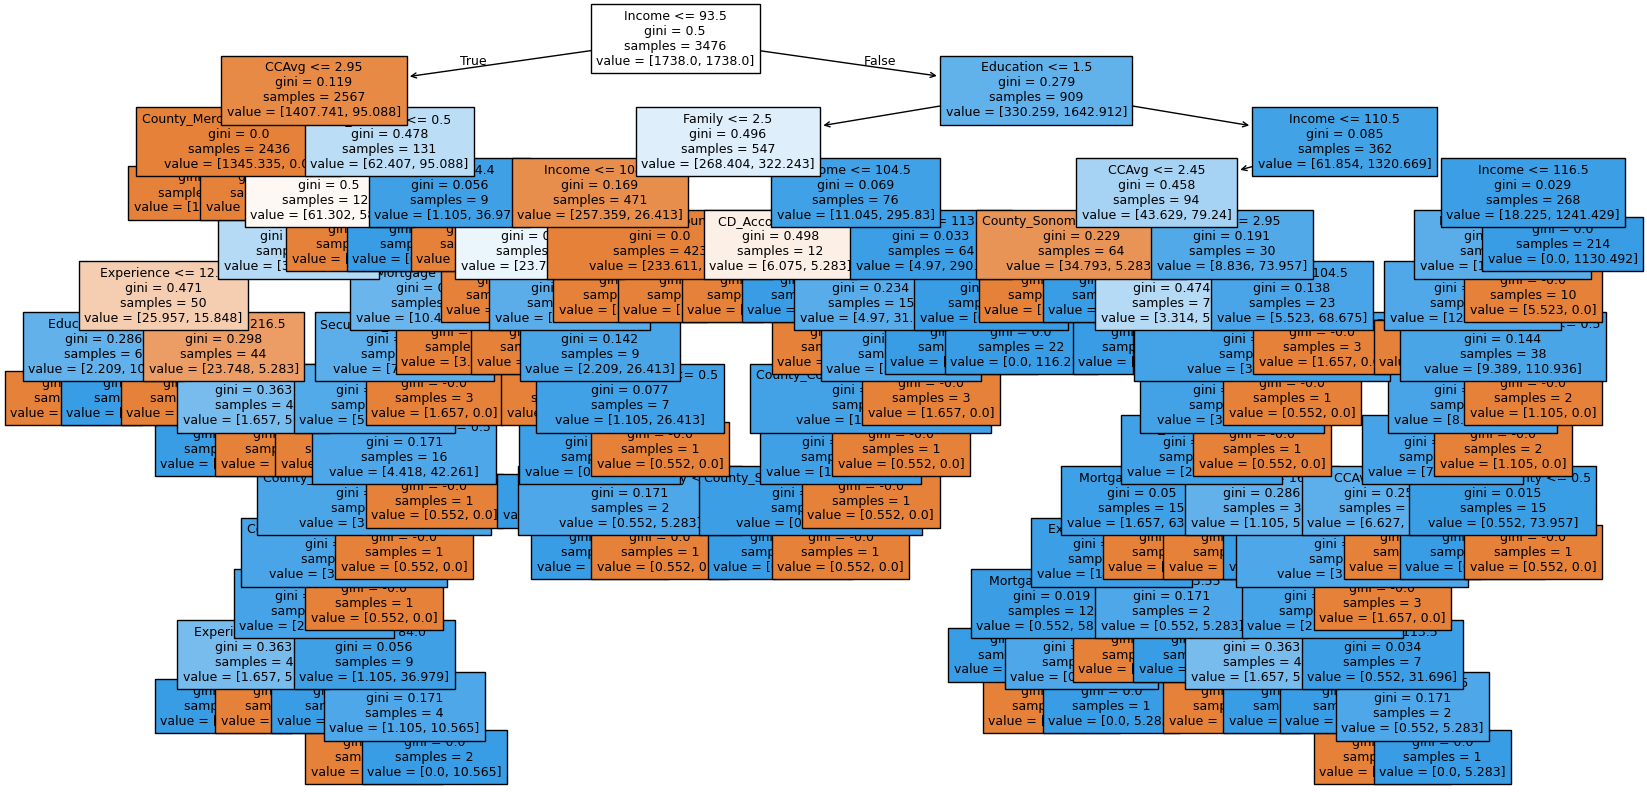

In [ ]:
x

In [ ]:
#check depth of the sklearn default tree, knowing the default minimum leaf samples is 1
dtree_def_depth = dtree_def.get_depth()
print("Default tree depth: ", dtree_def_depth)

Default tree depth:  14


In [ ]:
#check the sorted list of importances
dtree_def_importances = dtree_def.feature_importances_
indices = np.argsort(dtree_def_importances)

print(pd.DataFrame(dtree_def.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by='Importance', ascending = False))

                                 Importance
Income                         6.271437e-01
Family                         1.290135e-01
CCAvg                          1.041720e-01
Education                      8.260850e-02
Experience                     1.528820e-02
CD_Account                     1.119253e-02
Mortgage                       1.013653e-02
County_Sonoma County           5.277708e-03
Age                            5.217713e-03
County_Orange County           1.643621e-03
County_Santa Clara County      1.628817e-03
Securities_Account             1.441358e-03
County_Kern County             1.228338e-03
County_San Diego County        1.200016e-03
County_Yolo County             1.109989e-03
County_Contra Costa County     5.836180e-04
County_San Bernardino County   5.739626e-04
County_Los Angeles County      5.399281e-04
County_Merced County           2.578173e-16
County_San Mateo County        7.461461e-17
Online                         0.000000e+00
CreditCard                     0

In [ ]:
#print the tree rules
print(tree.export_text(dtree_def, feature_names=feature_names, show_weights=True))

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- County_Merced County <= 0.50
|   |   |   |--- weights: [1343.68, 0.00] class: 0
|   |   |--- County_Merced County >  0.50
|   |   |   |--- weights: [1.66, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.75
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [2.21, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- weights: [0.00, 10.57] class: 1
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  216.50
|   |   |   |   |   |   |   |--- Income <= 67.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 5.28] class: 1
|   |   |   |   |   |   |   |--- Income >  67.50
|   |   | 

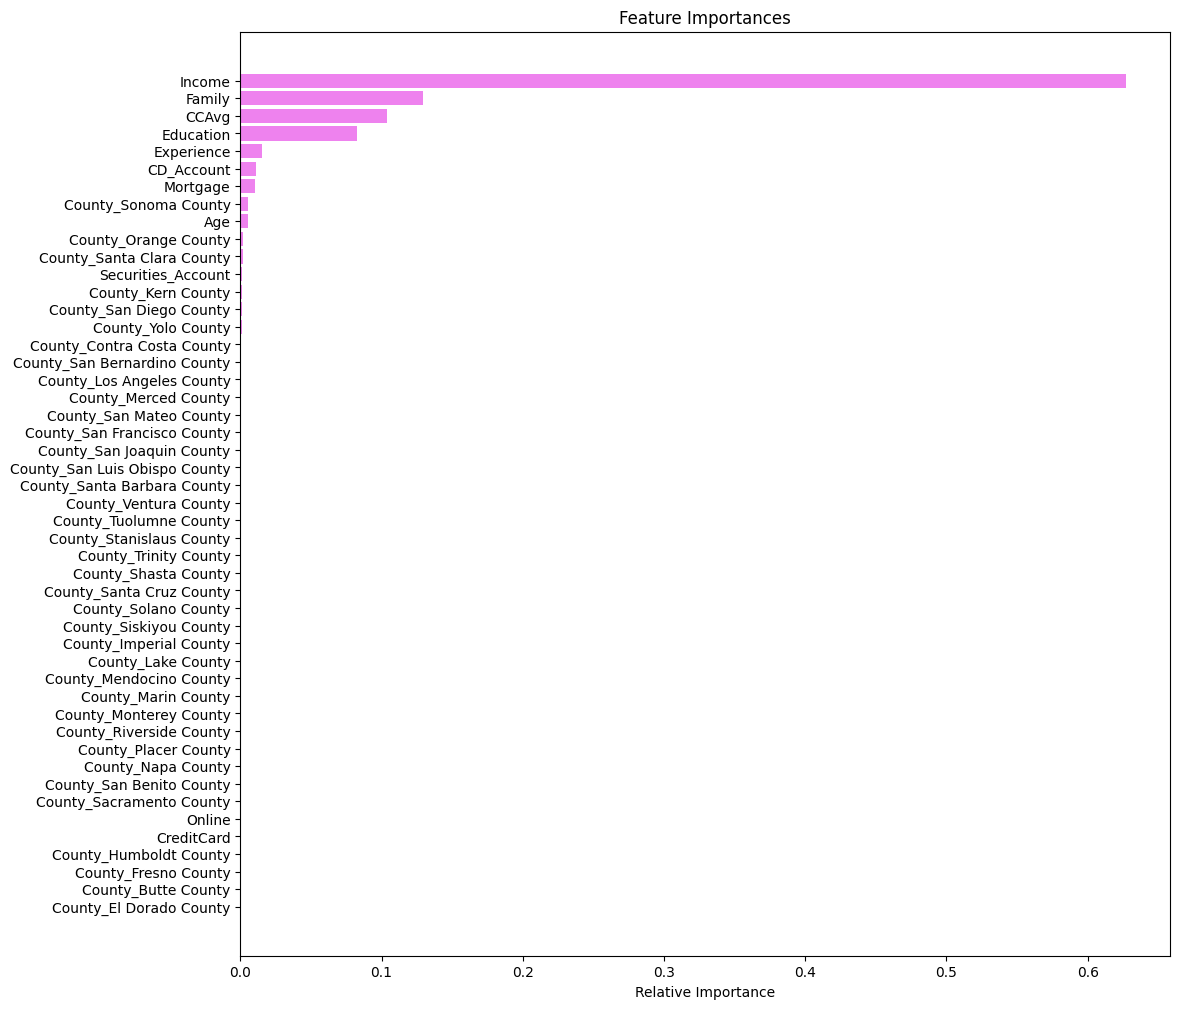

In [ ]:
#visualize importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), dtree_def_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, family, and credit card average are the most important features in the SKLearn default tree.

## Model Performance Improvement

### Model Building -- Pre-pruning

In [ ]:
#use gridsearchcv to find the right mix of tree depth and min leaf samples
#depth on default is 14 so we'll try numbers below that
param_grid_pre = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

#model
dtree_estimator1 = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')

#use gridsearchcv -- similar implementation to AI quiz with mentor
#use recall scoring since we want recall to be the best
grid_search_pre1 = GridSearchCV(dtree_estimator1, param_grid_pre, scoring = 'recall', cv = 5)
grid_search_pre1.fit(X_train, y_train)

#best params
best_params_pre1 = grid_search_pre1.best_params_

#best recall score
best_recall_pre1 = grid_search_pre1.best_score_

In [ ]:
#show the outcome
print("Best parameters: ", best_params_pre1)
print("Best recall: ", best_recall_pre1)

Best parameters:  {'max_depth': 2, 'min_samples_leaf': 2}
Best recall:  1.0


In [ ]:
#make the pre-pruned tree based on the gridsearchcv results
dtree_pre1 = grid_search_pre1.best_estimator_

#predict
y_train_pred_pre1 = dtree_pre1.predict(X_train)
y_test_pred_pre1 = dtree_pre1.predict(X_test)

#### Model Evaluation

##### Metrics and Confusion Matrices

In [ ]:
#Checking the pre-pruned model performance on the train set,
#though Gridsearch already did that (we'll need the metrics for comparison later)

accuracy_train_pre1 = accuracy_score(y_train, y_train_pred_pre1)
recall_train_pre1 = recall_score(y_train, y_train_pred_pre1)
precision_train_pre1 = precision_score(y_train, y_train_pred_pre1)
f1_train_pre1 = f1_score(y_train, y_train_pred_pre1)

In [ ]:
#make a dataframe to show all the performance metrics on the training set
perf_metrics_pre1_train = pd.DataFrame({"Accuracy": accuracy_train_pre1, "Recall": recall_train_pre1, "Precision": precision_train_pre1, "F1": f1_train_pre1}, index=[0])
perf_metrics_pre1_train

,Accuracy,Recall,Precision,F1
0,0.795455,1.0,0.316346,0.480643


In [ ]:
#Checking the pre-pruned model performance on the test set
accuracy_test_pre1 = accuracy_score(y_test, y_test_pred_pre1)
recall_test_pre1 = recall_score(y_test, y_test_pred_pre1)
precision_test_pre1 = precision_score(y_test, y_test_pred_pre1)
f1_test_pre1 = f1_score(y_test, y_test_pred_pre1)

In [ ]:
#make a dataframe to show all the performance metrics
perf_metrics_pre1_test = pd.DataFrame({"Accuracy": accuracy_test_pre1, "Recall": recall_test_pre1, "Precision": precision_test_pre1, "F1": f1_test_pre1}, index=[0])
perf_metrics_pre1_test

,Accuracy,Recall,Precision,F1
0,0.787919,1.0,0.318966,0.48366


The recall from this version of the pre-pruned tree is perfect but precision and F1 are horrendous.

In [ ]:
#comparison to the performance metrics from the sklearn default tree
perf_metrics_def1_test

,Accuracy,Recall,Precision,F1
0,0.974497,0.864865,0.876712,0.870748


Recall has improved but clearly at the expense of the other metrics.

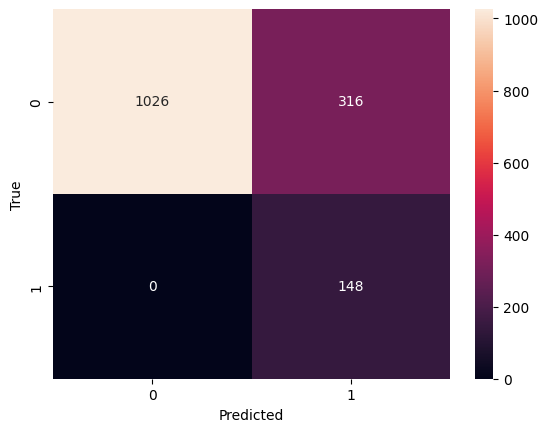

In [ ]:
#make confusion matrix to see how model performed on test set
cm_pre1_test = confusion_matrix(y_test, y_test_pred_pre1)
sns.heatmap(cm_pre1_test, annot=True, fmt='')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

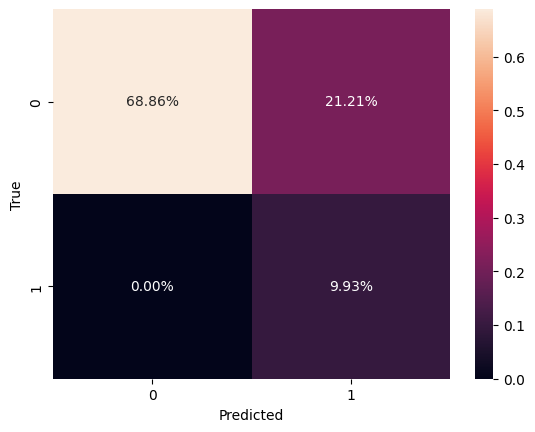

In [ ]:
#making the confusion matrix again with percentages
cm_pre1_test2 = confusion_matrix(y_test, y_test_pred_pre1)
sns.heatmap(cm_pre1_test2/np.sum(cm_pre1_test2), annot=True, fmt = '.2%')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The first pre-pruned tree had no false negatives, but a rather high amount of false positives.

##### Visualization and Importances

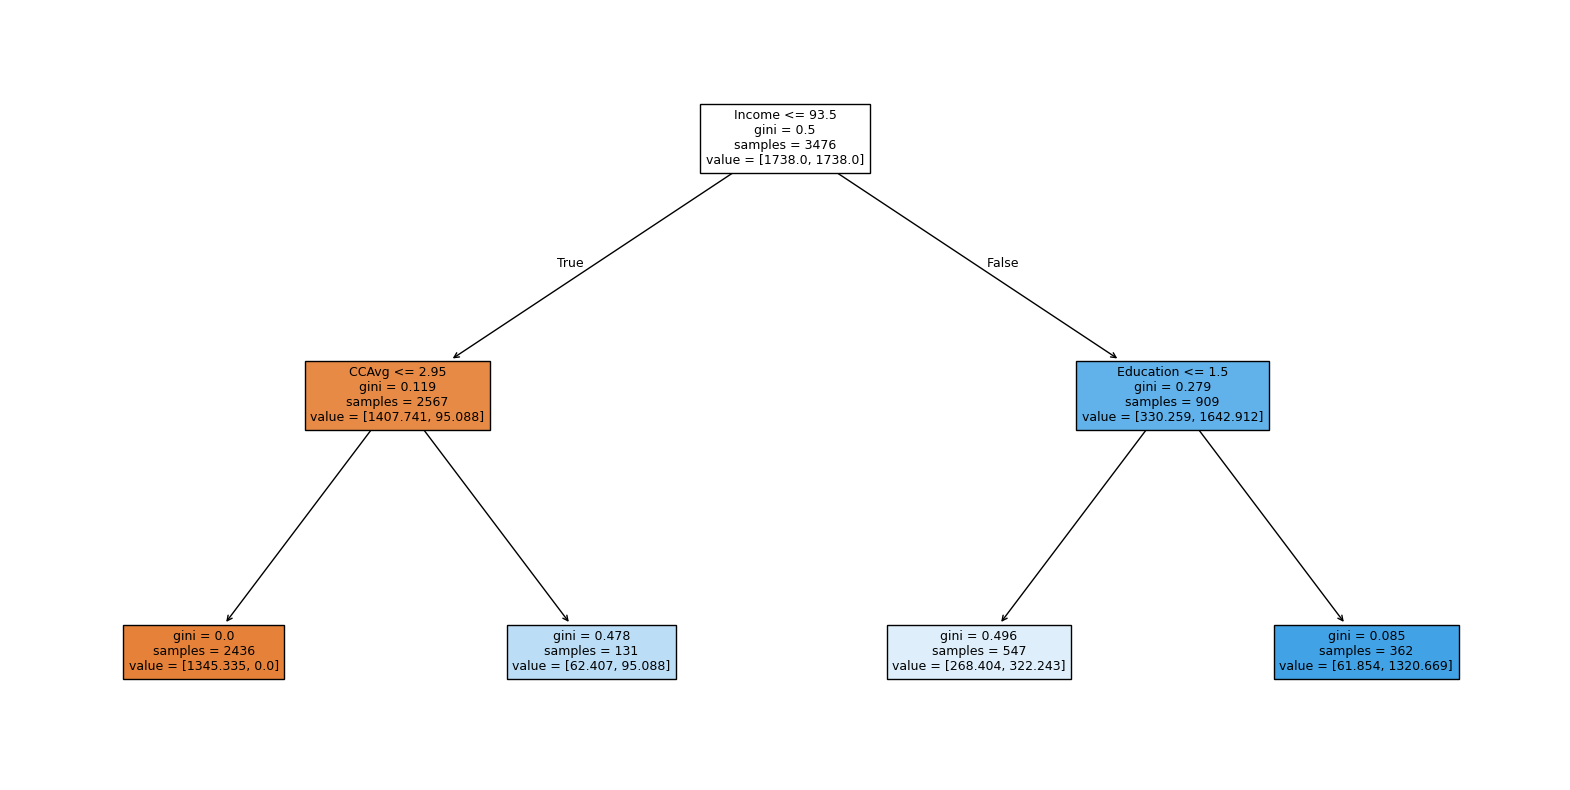

In [ ]:
#visualize preprune tree

#feature names parameter was created in the first tree visualization

#make the plot
plt.figure(figsize=(20,10))
plot_tree(dtree_pre1, feature_names = feature_names, fontsize = 9, filled=True)
plt.show()

In [ ]:
#confirming the depth of the pre-prune tree is 2
dtree_pre1_depth = dtree_pre1.get_depth()
print("Pre-prune tree 1 depth: ", dtree_pre1_depth)

Pre-prune tree 1 depth:  2


In [ ]:
#sorted list of importances
dtree_pre1_importances = dtree_pre1.feature_importances_
indices = np.argsort(dtree_pre1_importances)

print(pd.DataFrame(dtree_pre1.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by='Importance', ascending = False))

                               Importance
Income                           0.806882
Education                        0.110994
CCAvg                            0.082124
Age                              0.000000
Family                           0.000000
Experience                       0.000000
Mortgage                         0.000000
Securities_Account               0.000000
CD_Account                       0.000000
Online                           0.000000
CreditCard                       0.000000
County_Butte County              0.000000
County_Contra Costa County       0.000000
County_El Dorado County          0.000000
County_Fresno County             0.000000
County_Humboldt County           0.000000
County_Imperial County           0.000000
County_Kern County               0.000000
County_Lake County               0.000000
County_Los Angeles County        0.000000
County_Marin County              0.000000
County_Mendocino County          0.000000
County_Merced County             0

In [ ]:
#print the tree rules
print(tree.export_text(dtree_pre1, feature_names=feature_names, show_weights=True))

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1345.33, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [62.41, 95.09] class: 1
|--- Income >  93.50
|   |--- Education <= 1.50
|   |   |--- weights: [268.40, 322.24] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [61.85, 1320.67] class: 1



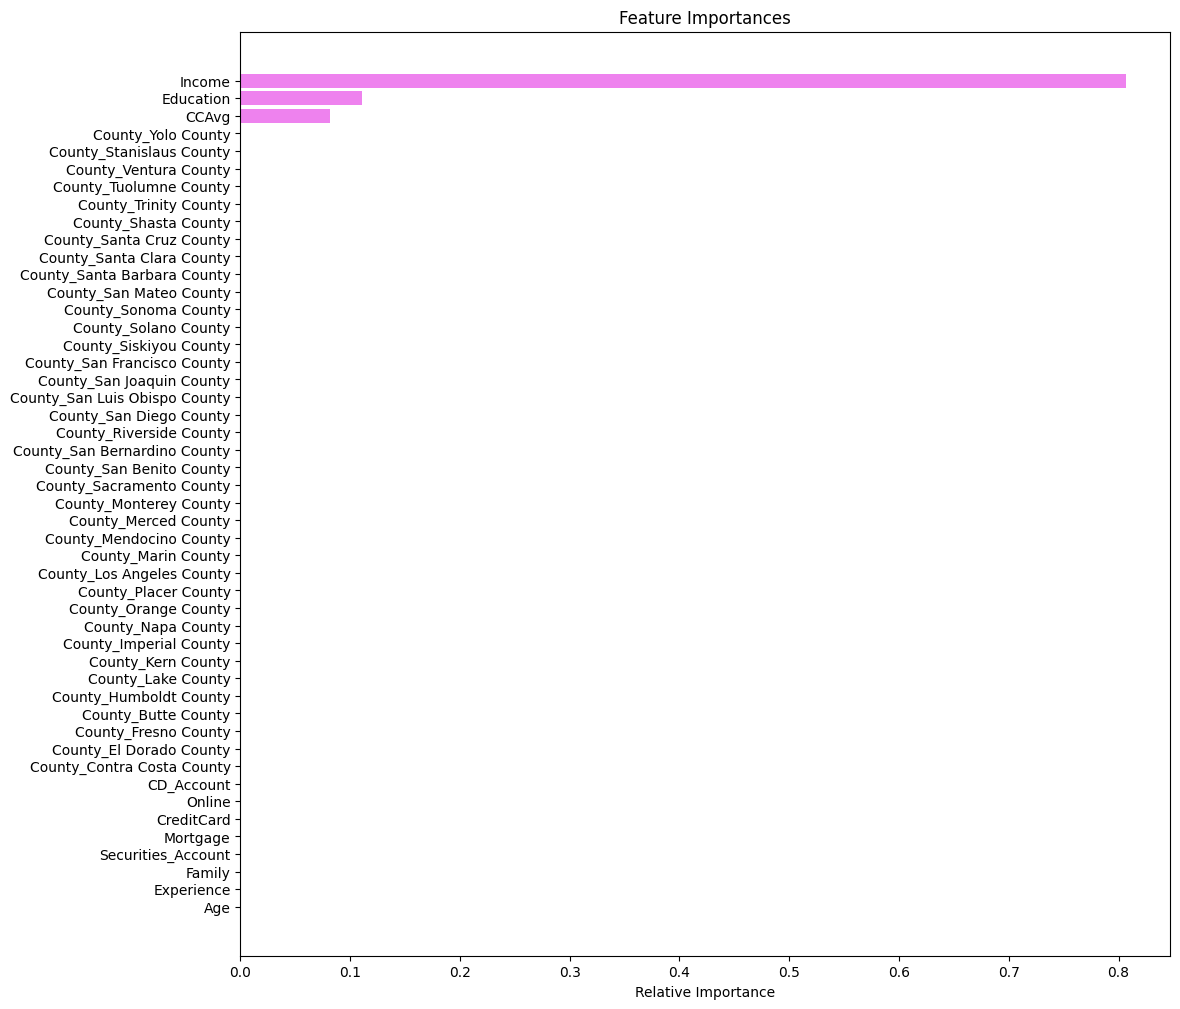

In [ ]:
#visualize importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), dtree_pre1_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, education, and credit card average are the most important features of the first pre-prune tree.

### Model Building -- Pre-pruning with GridSearch F1 scoring

In [ ]:
#another attempt at the pre-pruned tree
#this time we'll use F1 score in gridsearch
#f1 incorporates both precision and recall -- so a better f1 score should result in better balance in the evaluation metrics

#use gridsearchcv again, and param_grid_pre from earlier

#model
dtree_estimator2 = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')

#use gridsearchcv -- with f1 scoring
grid_search_pre2 = GridSearchCV(dtree_estimator2, param_grid_pre, scoring = 'f1', cv = 5)
grid_search_pre2.fit(X_train, y_train)

#best params
best_params_pre2 = grid_search_pre2.best_params_

#best recall score
best_recall_pre2 = grid_search_pre2.best_score_

In [ ]:
#show the outcome
print("Best parameters: ", best_params_pre2)
print("Best recall: ", best_recall_pre2)

Best parameters:  {'max_depth': 13, 'min_samples_leaf': 2}
Best recall:  0.8801167869843407


This version of the pre-pruned tree has more depth than the previous one.

In [ ]:
#make the pre-pruned tree based on the gridsearchcv results
dtree_pre2 = grid_search_pre2.best_estimator_

#predict
y_train_pred_pre2 = dtree_pre2.predict(X_train)
y_test_pred_pre2 = dtree_pre2.predict(X_test)

#### Model Evaluation

##### Metrics and Confusion Matrices

In [ ]:
#pre-pruned model performance on training set -- however, gridsearch already ran it on the training set
accuracy_train_pre2 = accuracy_score(y_train, y_train_pred_pre2)
recall_train_pre2 = recall_score(y_train, y_train_pred_pre2)
precision_train_pre2 = precision_score(y_train, y_train_pred_pre2)
f1_train_pre2 = f1_score(y_train, y_train_pred_pre2)

In [ ]:
#make a dataframe to show all the performance metrics on the training set
perf_metrics_pre2_train = pd.DataFrame({"Accuracy": accuracy_train_pre2, "Recall": recall_train_pre2, "Precision": precision_train_pre2, "F1": f1_train_pre2}, index=[0])
perf_metrics_pre2_train

,Accuracy,Recall,Precision,F1
0,0.995397,1.0,0.953623,0.976261


In [ ]:
#Checking the pre-pruned model performance on the test set
accuracy_test_pre2 = accuracy_score(y_test, y_test_pred_pre2)
recall_test_pre2 = recall_score(y_test, y_test_pred_pre2)
precision_test_pre2 = precision_score(y_test, y_test_pred_pre2)
f1_test_pre2 = f1_score(y_test, y_test_pred_pre2)

In [ ]:
#make a dataframe to show all the performance metrics on the test set
perf_metrics_pre2_test = pd.DataFrame({"Accuracy": accuracy_test_pre2, "Recall": recall_test_pre2, "Precision": precision_test_pre2, "F1": f1_test_pre2}, index=[0])
perf_metrics_pre2_test

,Accuracy,Recall,Precision,F1
0,0.977852,0.885135,0.891156,0.888136


In [ ]:
#comparison to the earlier prepruned model
perf_metrics_pre1_test

,Accuracy,Recall,Precision,F1
0,0.787919,1.0,0.318966,0.48366


In [ ]:
#comparison to the performance metrics from the sklearn default tree
perf_metrics_def1_test

,Accuracy,Recall,Precision,F1
0,0.974497,0.864865,0.876712,0.870748


The second pre-pruned tree appears to be overfit since we have a perfect recall score for the training set, which unsurprisingly dropped for the test set. However, while recall fell from the first pre-pruned tree's perfect score, it is still higher than the SKLearn default's recall score, and the other metrics look a lot better.

##### Visualization and Importances

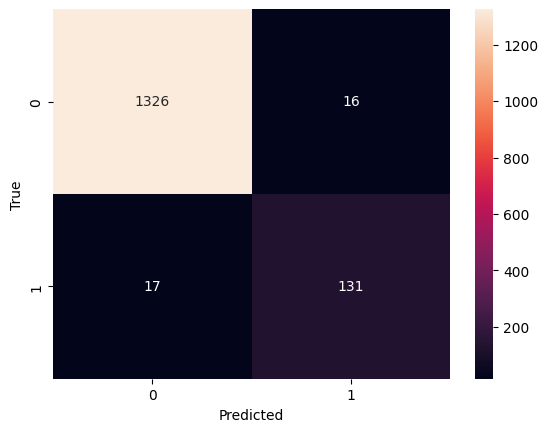

In [ ]:
#make confusion matrix to see how model performed on test set
cm_pre2_test = confusion_matrix(y_test, y_test_pred_pre2)
sns.heatmap(cm_pre2_test, annot=True, fmt='')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

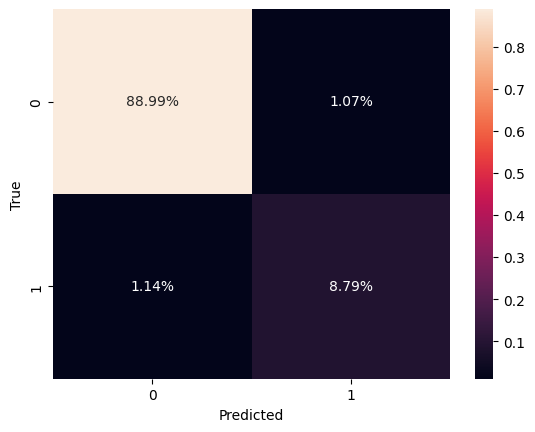

In [ ]:
#making the confusion matrix again with percentages
cm_pre2_test2 = confusion_matrix(y_test, y_test_pred_pre2)
sns.heatmap(cm_pre2_test2/np.sum(cm_pre2_test2), annot=True, fmt = '.2%')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This shows we had a very small amount of false negatives, which is what we're going for.

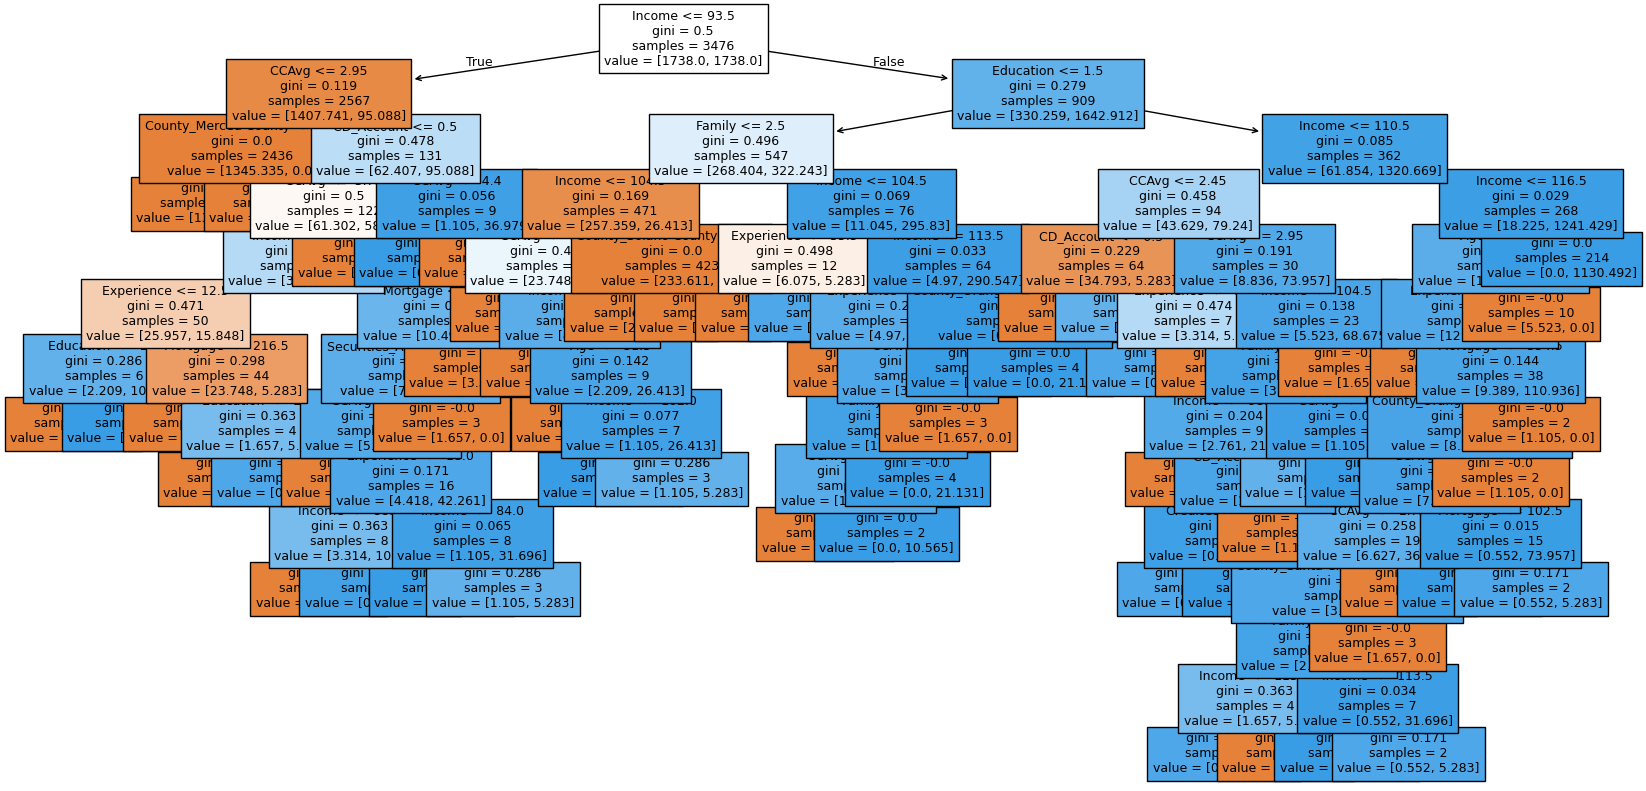

In [ ]:
#visualize new preprune tree

#make the plot
plt.figure(figsize=(20,10))
plot_tree(dtree_pre2, feature_names = feature_names, fontsize = 9, filled=True)
plt.show()

In [ ]:
#confirming the depth of this pre-pruned tree is 13
dtree_pre2_depth = dtree_pre2.get_depth()
print("Pre-prune tree 2 depth: ", dtree_pre2_depth)

Pre-prune tree 2 depth:  13


The tree looks complex, but has slightly less depth than the SKLearn default (13 vs 14), and better recall.

In [ ]:
#a look at the importances of the new tree
dtree_pre2_importances = dtree_pre2.feature_importances_
indices = np.argsort(dtree_pre2_importances)

print(pd.DataFrame(dtree_pre2.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by='Importance', ascending = False))

                                 Importance
Income                         6.345815e-01
Family                         1.304894e-01
CCAvg                          1.063757e-01
Education                      8.364829e-02
Experience                     1.393394e-02
CD_Account                     1.328794e-02
Mortgage                       7.343334e-03
Age                            6.077296e-03
County_Santa Clara County      1.643339e-03
Securities_Account             1.454209e-03
County_Orange County           1.120745e-03
CreditCard                     4.435682e-05
County_Merced County           2.601158e-16
County_Solano County           7.527982e-17
Online                         0.000000e+00
County_Butte County            0.000000e+00
County_Humboldt County         0.000000e+00
County_Fresno County           0.000000e+00
County_El Dorado County        0.000000e+00
County_Contra Costa County     0.000000e+00
County_Los Angeles County      0.000000e+00
County_Marin County            0

In [ ]:
#print the tree rules
print(tree.export_text(dtree_pre2, feature_names=feature_names, show_weights=True))

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- County_Merced County <= 0.50
|   |   |   |--- weights: [1343.68, 0.00] class: 0
|   |   |--- County_Merced County >  0.50
|   |   |   |--- weights: [1.66, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.75
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [2.21, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- weights: [0.00, 10.57] class: 1
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  216.50
|   |   |   |   |   |   |   |--- Education <= 2.00
|   |   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.00
|   | 

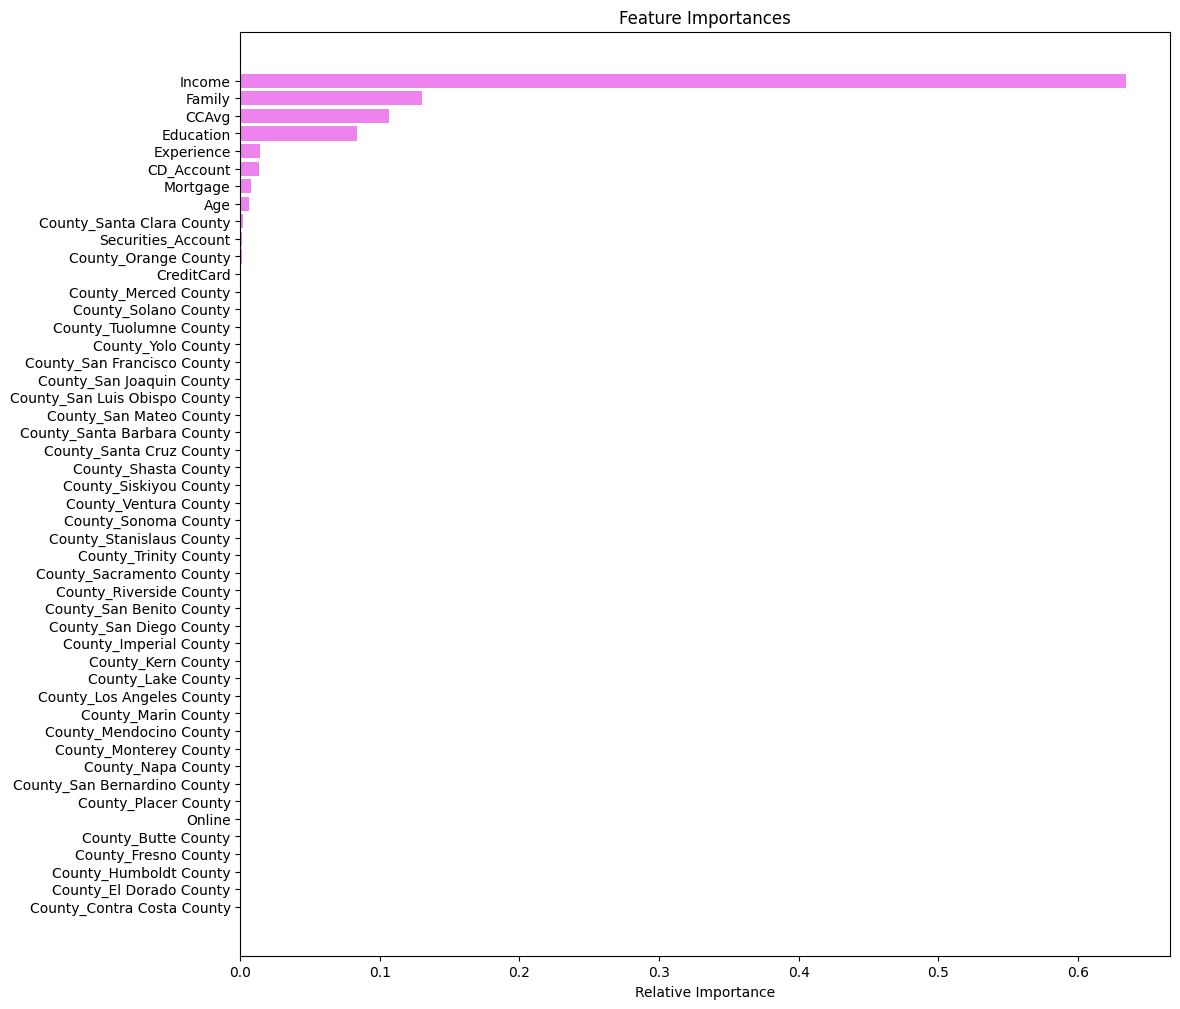

In [ ]:
#visualize importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), dtree_pre2_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, family, and credit card average are the most important features for this tree.

### Model Building -- Post-pruning

In [ ]:
#post-pruning

dtree_clf1 = DecisionTreeClassifier(random_state=1, class_weight = 'balanced')

#cost complexity pruning path
path1 = dtree_clf1.cost_complexity_pruning_path(X_train, y_train)

#effective alphas from pruning path
ccp_alphas1 = abs(path1.ccp_alphas)

#array of total impurities at each alpha along pruning path
impurities1 = path1.impurities


In [ ]:
#a look at the pruning path
pd.DataFrame(path1)

,ccp_alphas,impurities
0,0.000000e+00,-6.581947e-17
1,3.307047e-17,-3.274900e-17
2,3.730730e-17,4.558307e-18
3,1.289086e-16,1.334669e-16
4,1.556275e-04,3.112550e-04
5,1.561605e-04,6.235760e-04
6,1.561605e-04,1.248218e-03
7,2.962314e-04,2.729375e-03
8,2.987615e-04,3.028137e-03
9,3.019780e-04,3.934070e-03


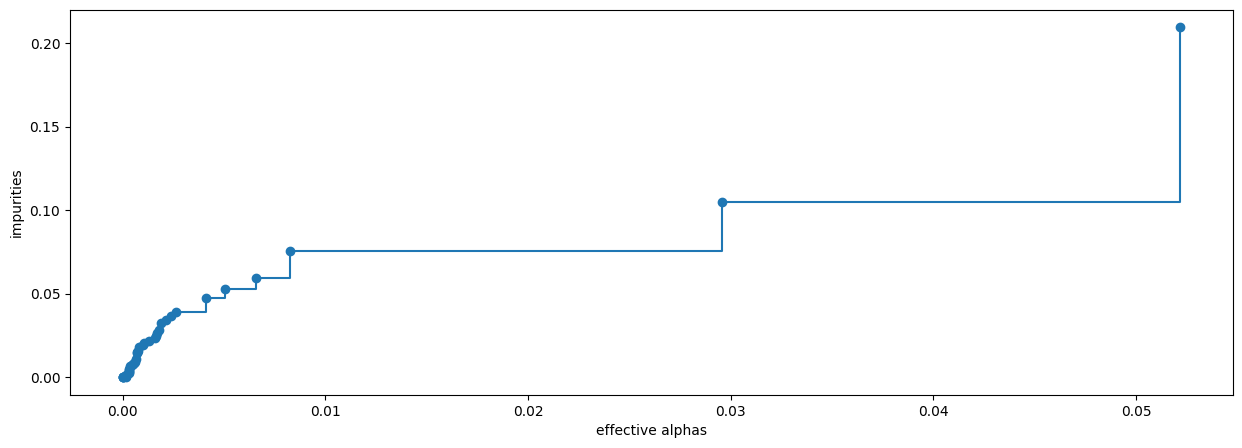

In [ ]:
#plot impurities vs effective alphas
#exclude the last effective alpha value from the plot, as it is the one that prunes the whole tree and only leaves one node
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas1[:-1], impurities1[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alphas")
ax.set_ylabel("impurities")
plt.show()

In [ ]:
#create the post-pruned trees based on the effective alphas, continuing to use balanced class weight
dtree_clfs_post1 = []
for ccp_alpha in ccp_alphas1:
    clf_post1 = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced', ccp_alpha = ccp_alpha)
    clf_post1.fit(X_train, y_train)
    dtree_clfs_post1.append(clf_post1)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(dtree_clfs_post1[-1].tree_.node_count, ccp_alphas1[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2905331413097623


This is the last decision tree that has been completely pruned and left with just one node.

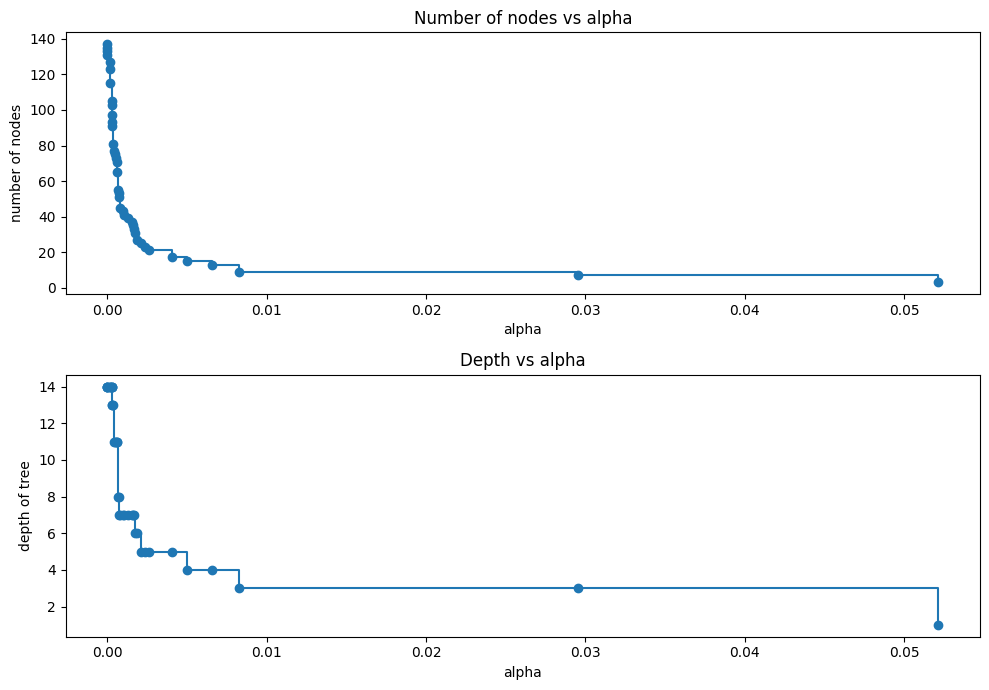

In [ ]:
#get rid of the last decision tree with just one node from our lists
dtree_clfs_post1 = dtree_clfs_post1[:-1]
ccp_alphas1 = ccp_alphas1[:-1]

#extract the number of nodes from each tree
node_counts = [clf.tree_.node_count for clf in dtree_clfs_post1]

#extract the max depth of each tree
depth = [clf.tree_.max_depth for clf in dtree_clfs_post1]

#make a plot with the number of nodes and alphas
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas1, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

#make a plot with the depths and alphas
ax[1].plot(ccp_alphas1, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

#make layout look good
fig.tight_layout()

In [ ]:
#find the recalls for the training set for the different post-pruned trees
recall_train_post1 = []
for clf in dtree_clfs_post1:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train_post1.append(values_train)

In [ ]:
#find the recalls for the test set for the different post-pruned trees
recall_test_post1 = []
for clf in dtree_clfs_post1:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test_post1.append(values_test)

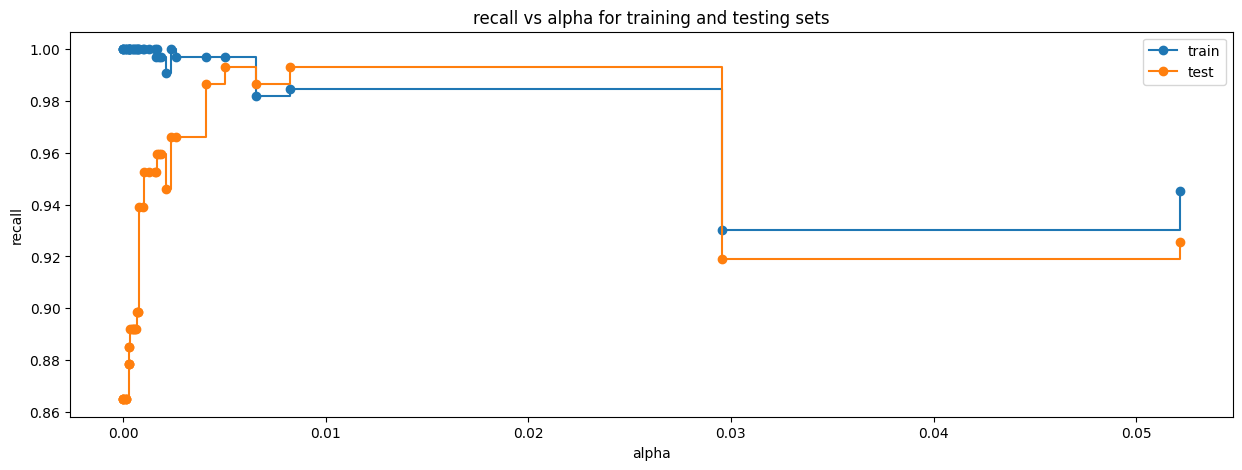

In [ ]:
#see how the different recalls look vs alphas
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("recall vs alpha for training and testing sets")
ax.plot(ccp_alphas1, recall_train_post1, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas1, recall_test_post1, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test_post1)
best_model = dtree_clfs_post1[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00501714795532976),
                       class_weight='balanced', random_state=1)


In [ ]:
#create the best post-prune model
dtree_post1 = best_model

#predict
y_train_pred_post1 = dtree_post1.predict(X_train)
y_test_pred_post1 = dtree_post1.predict(X_test)

#### Model Evaluation

##### Metrics and Confusion Matrices

In [ ]:
#look at metrics for the best post-prune model on train set
accuracy_train_post1 = accuracy_score(y_train, y_train_pred_post1)
recall_train_post1 = recall_score(y_train, y_train_pred_post1)
precision_train_post1 = precision_score(y_train, y_train_pred_post1)
f1_train_post1 = f1_score(y_train, y_train_pred_post1)

In [ ]:
#make a dataframe to show all the performance metrics on train set
perf_metrics_post1_train = pd.DataFrame({"Accuracy": accuracy_train_post1, "Recall": recall_train_post1, "Precision": precision_train_post1, "F1": f1_train_post1}, index=[0])
perf_metrics_post1_train

,Accuracy,Recall,Precision,F1
0,0.934983,0.99696,0.593128,0.743764


In [ ]:
#look at metrics for the best post-prune model on test set
accuracy_test_post1 = accuracy_score(y_test, y_test_pred_post1)
recall_test_post1 = recall_score(y_test, y_test_pred_post1)
precision_test_post1 = precision_score(y_test, y_test_pred_post1)
f1_test_post1 = f1_score(y_test, y_test_pred_post1)

In [ ]:
#make a dataframe to show all the performance metrics on test set
perf_metrics_post1_test = pd.DataFrame({"Accuracy": accuracy_test_post1, "Recall": recall_test_post1, "Precision": precision_test_post1, "F1": f1_test_post1}, index=[0])
perf_metrics_post1_test

,Accuracy,Recall,Precision,F1
0,0.940268,0.993243,0.625532,0.767624


In [ ]:
#compare to the second pre-pruned model that had well-balanced metrics
perf_metrics_pre2_test

,Accuracy,Recall,Precision,F1
0,0.977852,0.885135,0.891156,0.888136


In [ ]:
#compare to the sklearn default
perf_metrics_def1_test

,Accuracy,Recall,Precision,F1
0,0.974497,0.864865,0.876712,0.870748


We have a near-perfect recall score on the post-pruned model, which is far superior to the recall scores for the pre-pruned and SKLearn default trees. Precision and F1 aren't as strong as the other trees, though, but they aren't as terrible as the scores for the first pre-pruned tree.

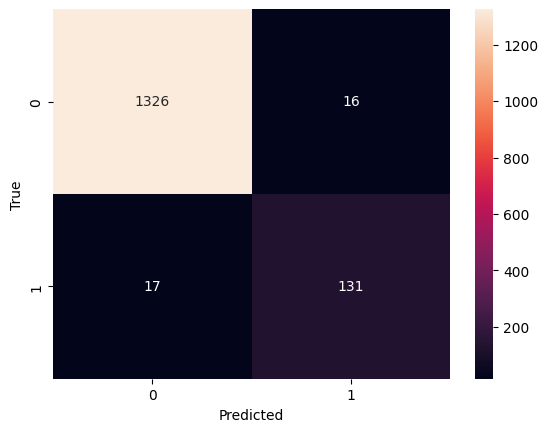

In [ ]:
#make confusion matrix to see how model performed on test set
cm_post1_test = confusion_matrix(y_test, y_test_pred_pre2)
sns.heatmap(cm_post1_test, annot=True, fmt='')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


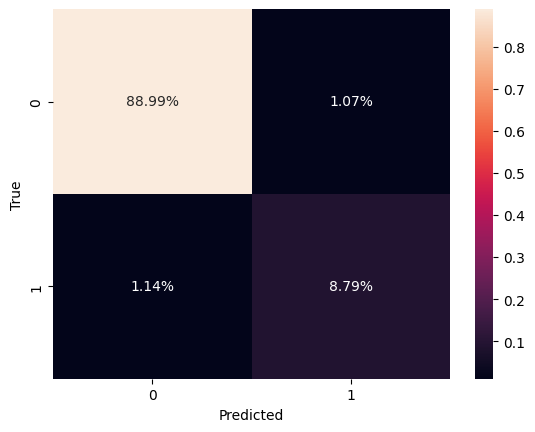

In [ ]:
#making the confusion matrix again with percentages
cm_post1_test = confusion_matrix(y_test, y_test_pred_pre2)
sns.heatmap(cm_post1_test/np.sum(cm_post1_test), annot=True, fmt = '.2%')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The post-pruned model false negatives and false positives have low percentages.

##### Visualization and Importances

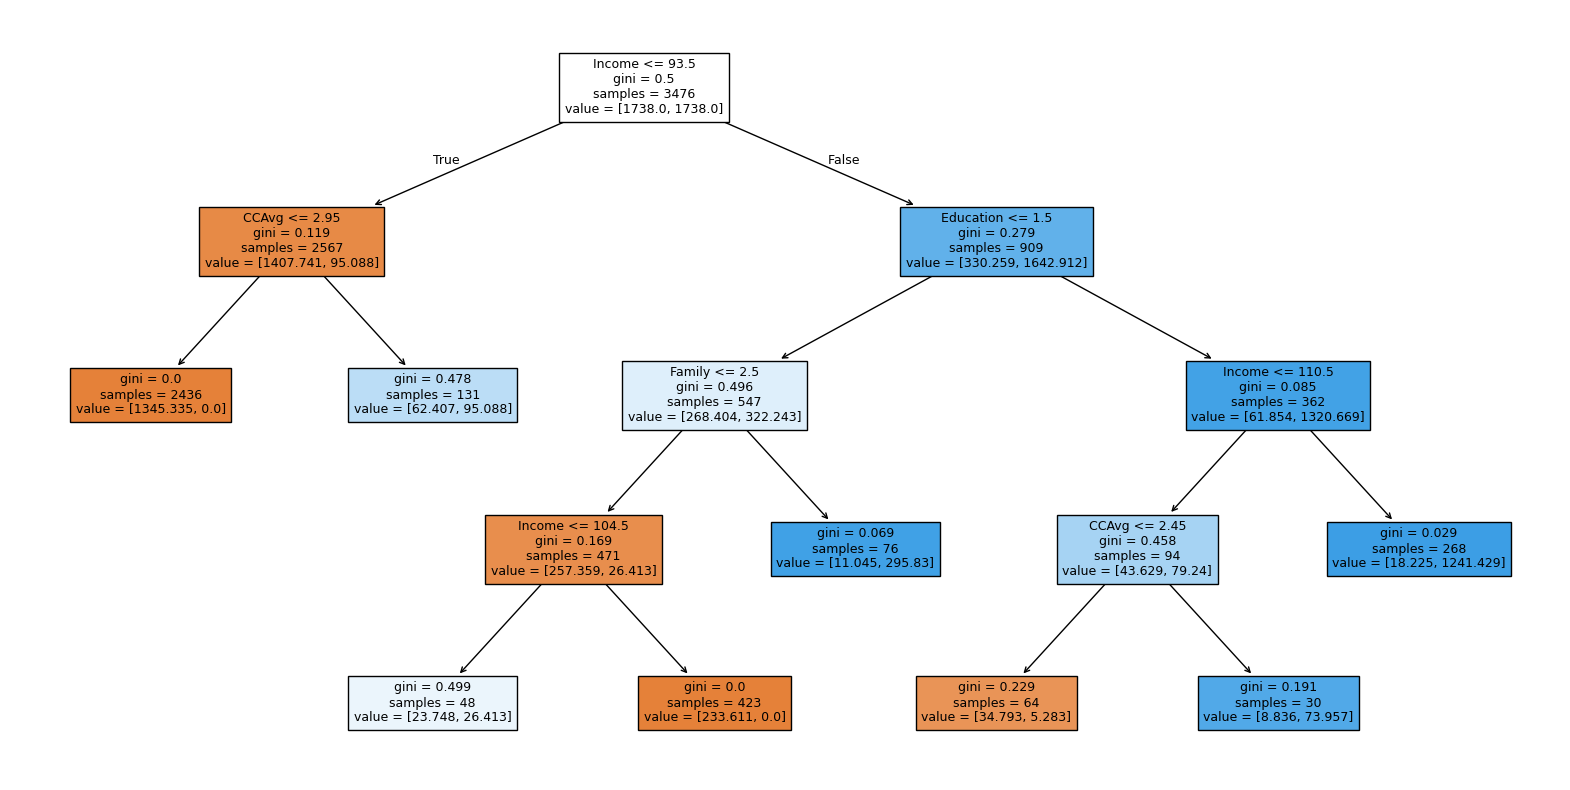

In [ ]:
#visualize tree

#make the plot
plt.figure(figsize=(20,10))
plot_tree(dtree_post1, feature_names = feature_names, fontsize = 9, filled=True)
plt.show()

In [ ]:
#depth of the post-pruned tree
dtree_post1_depth = dtree_post1.get_depth()
print("Post-pruned tree depth: ", dtree_post1_depth)

Post-pruned tree depth:  4


In [ ]:
#sorted list of importances
dtree_post1_importances = dtree_post1.feature_importances_
indices = np.argsort(dtree_post1_importances)

print(pd.DataFrame(dtree_post1.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by='Importance', ascending = False))

                               Importance
Income                           0.680682
Family                           0.143794
Education                        0.089311
CCAvg                            0.086214
Age                              0.000000
Experience                       0.000000
Mortgage                         0.000000
Securities_Account               0.000000
CD_Account                       0.000000
Online                           0.000000
CreditCard                       0.000000
County_Butte County              0.000000
County_Contra Costa County       0.000000
County_El Dorado County          0.000000
County_Fresno County             0.000000
County_Humboldt County           0.000000
County_Imperial County           0.000000
County_Kern County               0.000000
County_Lake County               0.000000
County_Los Angeles County        0.000000
County_Marin County              0.000000
County_Mendocino County          0.000000
County_Merced County             0

In [ ]:
#print the tree rules
print(tree.export_text(dtree_post1, feature_names=feature_names, show_weights=True))

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1345.33, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [62.41, 95.09] class: 1
|--- Income >  93.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 104.50
|   |   |   |   |--- weights: [23.75, 26.41] class: 1
|   |   |   |--- Income >  104.50
|   |   |   |   |--- weights: [233.61, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [11.05, 295.83] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 110.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- weights: [34.79, 5.28] class: 0
|   |   |   |--- CCAvg >  2.45
|   |   |   |   |--- weights: [8.84, 73.96] class: 1
|   |   |--- Income >  110.50
|   |   |   |--- weights: [18.22, 1241.43] class: 1



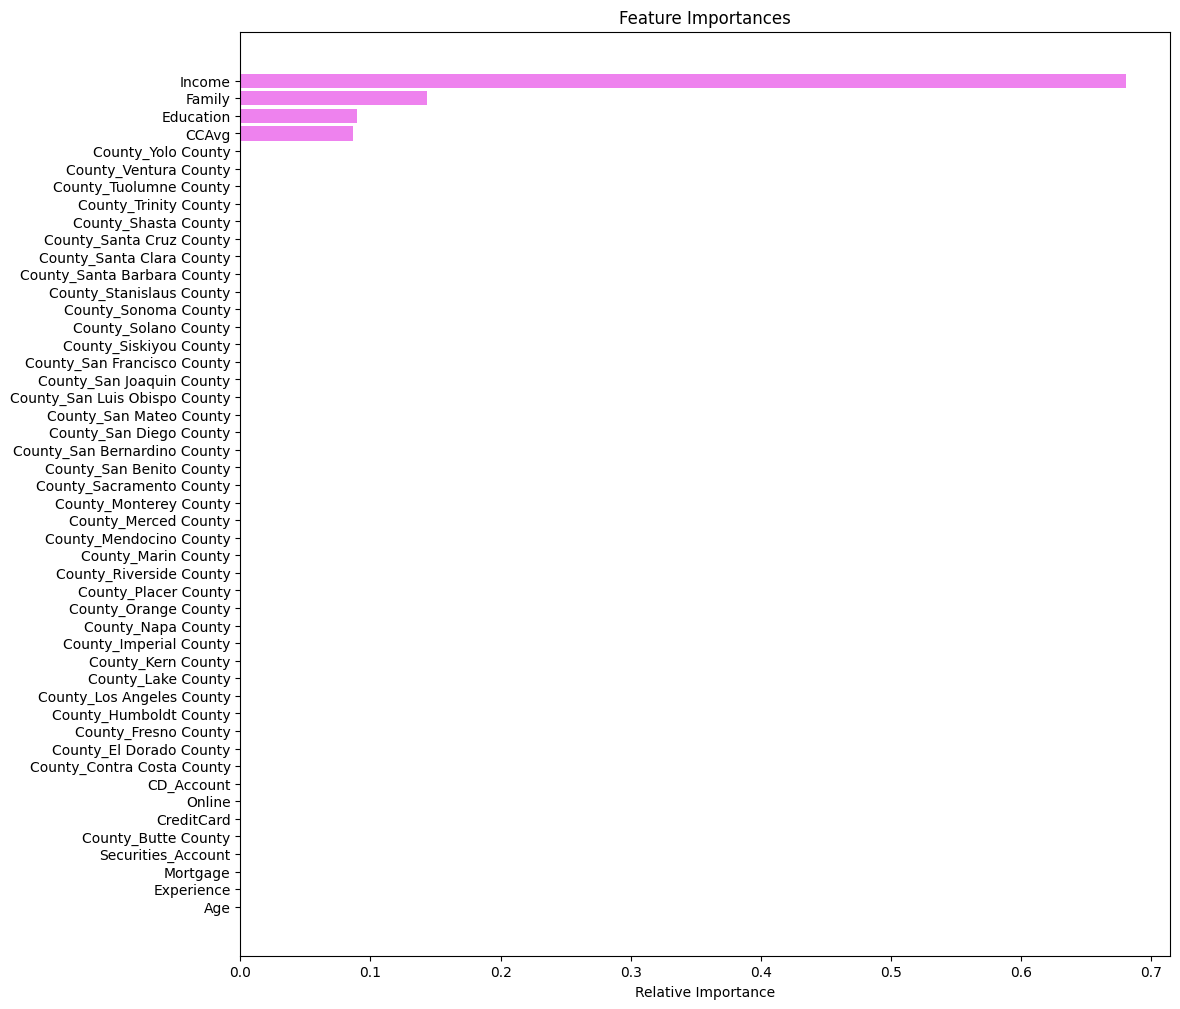

In [ ]:
#visualize importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), dtree_post1_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, family, and education are the most important variables in the post-pruned tree.

## Model Performance Comparison and Final Model Selection

### Metrics Comparisons

In [ ]:
# training performance comparison

models_train_comp = pd.concat(
    [
        perf_metrics_def1_train.T,
        perf_metrics_pre1_train.T,
        perf_metrics_pre2_train.T,
        perf_metrics_post1_train.T,
    ],
    axis=1,
)
models_train_comp.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Pre-Pruning with GridSearch f1 score)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Pre-Pruning with GridSearch f1 score),Decision Tree (Post-Pruning)
Accuracy,1.0,0.795455,0.995397,0.934983
Recall,1.0,1.000000,1.000000,0.996960
Precision,1.0,0.316346,0.953623,0.593128
F1,1.0,0.480643,0.976261,0.743764


In [ ]:
# test performance comparison

models_test_comp = pd.concat(
    [
        perf_metrics_def1_test.T,
        perf_metrics_pre1_test.T,
        perf_metrics_pre2_test.T,
        perf_metrics_post1_test.T,
    ],
    axis=1,
)
models_test_comp.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Pre-Pruning with GridSearch f1 score)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Pre-Pruning with GridSearch f1 score),Decision Tree (Post-Pruning)
Accuracy,0.974497,0.787919,0.977852,0.940268
Recall,0.864865,1.000000,0.885135,0.993243
Precision,0.876712,0.318966,0.891156,0.625532
F1,0.870748,0.483660,0.888136,0.767624


When it comes to the test set, the first pre-pruned tree had a perfect recall score, but precision and F1 were very low. The post-pruned tree had a near-perfect score, with better precision and F1 metrics. Additionally, the post-pruned tree showed only a slight decrease in recall performance in the test set compared to the training set, while all the other metrics actually improved slightly -- meaning it is not overfit and is robust. Since we are seeking a strong recall score, the post-pruned tree is the best option since it has a very high recall score, has balance among the other performance metrics, and shows robust performance on unseen data. Lastly, the post-pruned tree has a depth of 4 and is not complex.

### Predict likelihood a customer will take the personal loan

In [ ]:
#choosing a data point
customer_details = X_test.iloc[:1, :]

#making a prediction
taking_loan_prediction = dtree_post1.predict_proba(customer_details)

print(taking_loan_prediction[0, 1])

0.9855317549793311


The model thinks there's a 98.5% chance the customer will take the personal loan.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* The pre-pruned model can be used to predict more than 99% of the bank customers who would take the personal loan.
* When trying to identify which customers to target for personal loan marketing, it should pay close attention to income, family, and education.
* The bank should target customers making more than $93,500 a year, with an education level of at least an undergraduate degree, and a family of at least two people.


___